In [1]:
import numpy as np
np.__version__

'1.19.2'

In [2]:
import scipy
scipy.__version__

'1.6.2'

**numpy** - библиотека для векторищованных вычислений написана на С


**scipy** - библиотека для научных вычислений

# Почему надо юзать массивы numpy

In [3]:
a = list(range(1_000_000))
arr = np.arange(1_000_000)

In [4]:
%%timeit
[c * c for c in a]
# утилита timeit показывает время выполнения блока

68.3 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%%timeit
#а теперь проделаем тоже самое с массивом arr
arr * arr

1.5 ms ± 56.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


как видно, процесс вычсления при работе с мссивом numpy **в 50 раз короче** чем при работе со стандартном списком

**Слабое место питона** - это циклы, они обрабатываются ОЧЕНЬ долго. Поэтому необходимо стараться **уменьшить число циков** в прграмме. С этим очень помагает numpy

## Создание массива

In [6]:
a = np.array([12, 3, 12, 32]) # созпдавние одномерного массива (из списка)
a

array([12,  3, 12, 32])

In [7]:
# dtype - позволяет выбрать тип элементов массива
a = np.array([1, 2, 3, 4, 5], dtype=np.float64) 
# float64 - тип флоат из языка С++
a

array([1., 2., 3., 4., 5.])

In [8]:
a = np.array([1, 223, 33, 4, 5], dtype=float) 
# можно уазать питоновский флоат
a

array([  1., 223.,  33.,   4.,   5.])

In [9]:
# для создания двумерного массива необъходимо подать список вложеных списков
# все списки должны быть ОДИНАКОВОГО размера
a = np.array([[1, 2, 3, 4.999999],
              [4, 3, 2, 1],
              [1, 1, 1, 1]], dtype=np.float32)
a

array([[1.      , 2.      , 3.      , 4.999999],
       [4.      , 3.      , 2.      , 1.      ],
       [1.      , 1.      , 1.      , 1.      ]], dtype=float32)

In [10]:
a.shape # Размер массива (по высоте и ширене)

(3, 4)

In [11]:
a.ndim # Число осей (число размерностей)

2

In [12]:
a.dtype # Тип данных элементов массива

dtype('float32')

In [13]:
m = a.astype(int) # меняет тип данных на новый, в нашем случае просто отбросил
# целую часть"
# при этом создается новый массив
#ВНИМАНИЕ -можно потерять данные если больший тип кидаем в меньший
print(a)
print()
print(m)

[[1.       2.       3.       4.999999]
 [4.       3.       2.       1.      ]
 [1.       1.       1.       1.      ]]

[[1 2 3 4]
 [4 3 2 1]
 [1 1 1 1]]


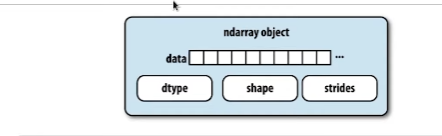

Массивы в numpy хрятся в памяти в виде большого куска данных, последователньо, в одноу строчку.
Когда мы изменяем размерность массива мы просто переставляем указатели, которые говорят о том где начинается новая строка или столбец. 

У каждого объекта ndarray есть три атрибута dtype, shape, strides

strides - говорит о том на сколько байтов нам надо отступить чтобы перейти к следующему элементу.

In [14]:
a.strides # так как у нас двуменрый массив первый элемент соответствует 
#движению между строками (на сколько байт надо сдвинутся, чтобы перейти на новую строку)
# воторой - число байт для сдвига вдоль строки

(16, 4)

In [15]:
a.dtype.itemsize # эквивалентно sizeof(np.float32) 
# размер типа в байтах

4

## Изменение формы массива

Так как массив хранится в виде единого куска памяти, то операции по изменению
его формы почти бесплатные - достаточно изменить атрибут shape и strides

In [16]:
a

array([[1.      , 2.      , 3.      , 4.999999],
       [4.      , 3.      , 2.      , 1.      ],
       [1.      , 1.      , 1.      , 1.      ]], dtype=float32)

In [17]:
a.reshape(4, 3) # изменяем атрибут shape, strides поменяется автоматически.
# в данном случае мы НЕ разворачиваем массив, а лишь указываем позицию 
# c которой начнется нованя строка. Так как наш массив едины кусоок в памяти 
# меняется лишь указатели, а не все располжение элементов

array([[1.      , 2.      , 3.      ],
       [4.999999, 4.      , 3.      ],
       [2.      , 1.      , 1.      ],
       [1.      , 1.      , 1.      ]], dtype=float32)

Мы также можем указать только один из парраметров (на месте пропуска ставится -1).Тогда numpy поделит массив в соответствии с этим парраметром

In [18]:
a.reshape(-1, 2) # разобъем массив на два столбца
# в таком случае через каждые два элемента будет начинаться новая строка

array([[1.      , 2.      ],
       [3.      , 4.999999],
       [4.      , 3.      ],
       [2.      , 1.      ],
       [1.      , 1.      ],
       [1.      , 1.      ]], dtype=float32)

In [19]:
a.reshape(2, -1) # разобъем массив на две строки
# через первые 6 элементов мы перейдем на новую строку

array([[1.      , 2.      , 3.      , 4.999999, 4.      , 3.      ],
       [2.      , 1.      , 1.      , 1.      , 1.      , 1.      ]],
      dtype=float32)

При вызове вункции reshape возвращается ссылка на исходный массив, исходный массив, форма которого **не меняется**. Но по полученной ссылке можно **изменить** элементы исходного массива

In [20]:
m = a.reshape(12, -1)
print(a, m, sep='\n')
m[0, 0] = 10
a

[[1.       2.       3.       4.999999]
 [4.       3.       2.       1.      ]
 [1.       1.       1.       1.      ]]
[[1.      ]
 [2.      ]
 [3.      ]
 [4.999999]
 [4.      ]
 [3.      ]
 [2.      ]
 [1.      ]
 [1.      ]
 [1.      ]
 [1.      ]
 [1.      ]]


array([[10.      ,  2.      ,  3.      ,  4.999999],
       [ 4.      ,  3.      ,  2.      ,  1.      ],
       [ 1.      ,  1.      ,  1.      ,  1.      ]], dtype=float32)

In [21]:
b = a.flatten() # метод вытягивает массив в одну строку (как он лежит в памяти)
# но при этом возвращает КОПИЮ исходного массива
b

array([10.      ,  2.      ,  3.      ,  4.999999,  4.      ,  3.      ,
        2.      ,  1.      ,  1.      ,  1.      ,  1.      ,  1.      ],
      dtype=float32)

In [22]:
b = a.ravel() # вытягивает массив в одну строку но не возвращает копию
# по-сути это reshape(-1)
b

array([10.      ,  2.      ,  3.      ,  4.999999,  4.      ,  3.      ,
        2.      ,  1.      ,  1.      ,  1.      ,  1.      ,  1.      ],
      dtype=float32)

In [23]:
nk = np.array([[1, 2, 3],
              [4, 5, 6]])
nk.reshape(-1)

array([1, 2, 3, 4, 5, 6])

Операция **транспонирования** тоже **не приводит** к копированию данных, меняются только указатели у новой ссылки

In [24]:
a = np.array([[1, 2, 3, 4.999999],
              [4, 3, 2, 1],
              [1, 1, 1, 1]], dtype=np.float32)
c = a.T # транспонирование (анлог a.transponse)
c

array([[1.      , 4.      , 1.      ],
       [2.      , 3.      , 1.      ],
       [3.      , 2.      , 1.      ],
       [4.999999, 1.      , 1.      ]], dtype=float32)

In [25]:
c[0, 0] = 99
a

array([[99.      ,  2.      ,  3.      ,  4.999999],
       [ 4.      ,  3.      ,  2.      ,  1.      ],
       [ 1.      ,  1.      ,  1.      ,  1.      ]], dtype=float32)

Новая ссылка отличается от старой (помимо shape) полем **strides**

In [26]:
a.strides, c.strides # аналогично и с reshape

((16, 4), (4, 16))

Метод transpnse позволяет указать какие оси будут менятся местами.

In [27]:
s = np.array([[[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [7, 8, 9]],
              [[10, 11, 12],
               [13, 14, 15],
               [16, 17, 18],
               [7, 8, 9]]])
s.shape

(2, 4, 3)

In [28]:
s.transpose((2, 0, 1)).shape # в даннном примере числа в кортеже - индексы осей
# которые должны стоять на данной позиции

(3, 2, 4)

In [29]:
s.transpose().shape # при отсутствии аргументов работает аналогично T

(3, 4, 2)

**Фиктивные оси** - оси размерность которых равна единице. 
Для чего они нужны

In [30]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# допустим мне нужно сделать этот вектор первой стракой новой матрицы
a[np.newaxis, :] # добавление новой размерности перед верхним уровенем

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [32]:
a[:, np.newaxis] # добавление новой размерности перед нижним уровенем

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [33]:
a = np.array([range(3), range(3, 6)])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [34]:
# expand_dims выполняет аналогичную функцию, но позволяет указать индекс оси
# перед которой выполняется подстановка
np.expand_dims(a, axis=1) # подстановка размерности перед первым уровнем

array([[[0, 1, 2]],

       [[3, 4, 5]]])

In [35]:
a = np.array([range(3), range(3, 6)])
a.shape

(2, 3)

In [36]:
# Добавим одну фиктивную размерность и в начало и в конец (вернется копия)
b = a[np.newaxis, :, np.newaxis]
b.shape

(1, 2, 1, 3)

## Cоздание массива с особыми свойствами

In [37]:
np.zeros(4) # массив нулей

array([0., 0., 0., 0.])

In [38]:
np.zeros(shape=(4, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [39]:
a = np.array([range(5), range(5, 10)])
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [40]:
np.zeros_like(a) # создает массив нулей такго же рзамера как и другой массив

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [41]:
np.ones(4) # полностью аналогичен np.zeros

array([1., 1., 1., 1.])

In [42]:
np.eye(6) # создает массив с единичной диагональю заданно высоты

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [43]:
np.arange(1, 15) # аналогичен range, только сохраняет сгенерированный массив
# в память

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [44]:
np.arange(0, 16, 5) # с шагом

array([ 0,  5, 10, 15])

In [45]:
np.arange(0, 16, 2.5) # шаг может быть дробным

array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ])

In [46]:
np.linspace(0, 10, 6) # на данном ортезке выбирает 6 равноудаленных точек

array([ 0.,  2.,  4.,  6.,  8., 10.])

# Не создавайте массивы лишний раз если можно рабоать с сылками

In [47]:
# есть три способа создать массив
a = np.array([23.23, 2.23, 3], dtype=np.float32)
b = np.asarray(a) # массив b указывает на те же данные что и a
# если бы тип данных в b был int, то данные скопировались бы из исходного м.
c = np.array(a) # array сзодает КОПИЮ массива
b[0] = 1
print(a, c, sep='\n')

[1.   2.23 3.  ]
[23.23  2.23  3.  ]


In [48]:
def func(x):
    x[0] = 0
a = np.array([23, 2, 3, 1]) 
func(a) # массивы передаются по ссылке
a

array([0, 2, 3, 1])

# Поэлементые операции с массивами

## Операции со скалярами, унарные операции

In [49]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
a + a # сложение или np.add

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [51]:
a + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [52]:
a * a # умножение или np.multiply

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [53]:
a * 10

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [54]:
a / 23  # деление

array([0.        , 0.04347826, 0.08695652, 0.13043478, 0.17391304,
       0.2173913 , 0.26086957, 0.30434783, 0.34782609, 0.39130435])

In [55]:
a / (a + 1) 

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ,
       0.83333333, 0.85714286, 0.875     , 0.88888889, 0.9       ])

In [56]:
 2 ** a # возведение в степень np.power

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)

In [57]:
a ** 2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [58]:
a ** a

array([        1,         1,         4,        27,       256,      3125,
           46656,    823543,  16777216, 387420489], dtype=int32)

In [59]:
np.sqrt(a) # корень

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [60]:
np.exp(a) # e в степень

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [61]:
np.log(a + 1) # натуральный логарифм

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509])

In [62]:
np.log2(1 + a) # взятие двоичного логарифма

array([0.        , 1.        , 1.5849625 , 2.        , 2.32192809,
       2.5849625 , 2.80735492, 3.        , 3.169925  , 3.32192809])

In [63]:
np.sin(a) # синус

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [64]:
a > 5 # сравнение или np.greater

array([False, False, False, False, False, False,  True,  True,  True,
        True])

## Агрегирующие операции

**Агрегирующие операции** - это процесс превращения значений набора данных в одно значение.

In [65]:
# создадим произвольный массив
import numpy as np
np.random.seed(5656)
a = np.random.randint(0, 10, size=(7,))
a[3] = 10
a

array([ 4,  6,  7, 10,  0,  3,  5])

In [66]:
a.min(), a.max(), a.argmax(), a.sum(), a.prod(), a.mean()
#argmax - индекс максимального элемента
#prod - произведенеие элементов массива (можно указать нужную ось)
#можно и через .np

(0, 10, 3, 35, 0, 5.0)

In [67]:
min(a), max(a), sum(a) # КРАЙНЕ НЕ РЕКОМЕНДУЕТСЯ так писать (работает только для одномерных массивов)

(0, 10, 35)

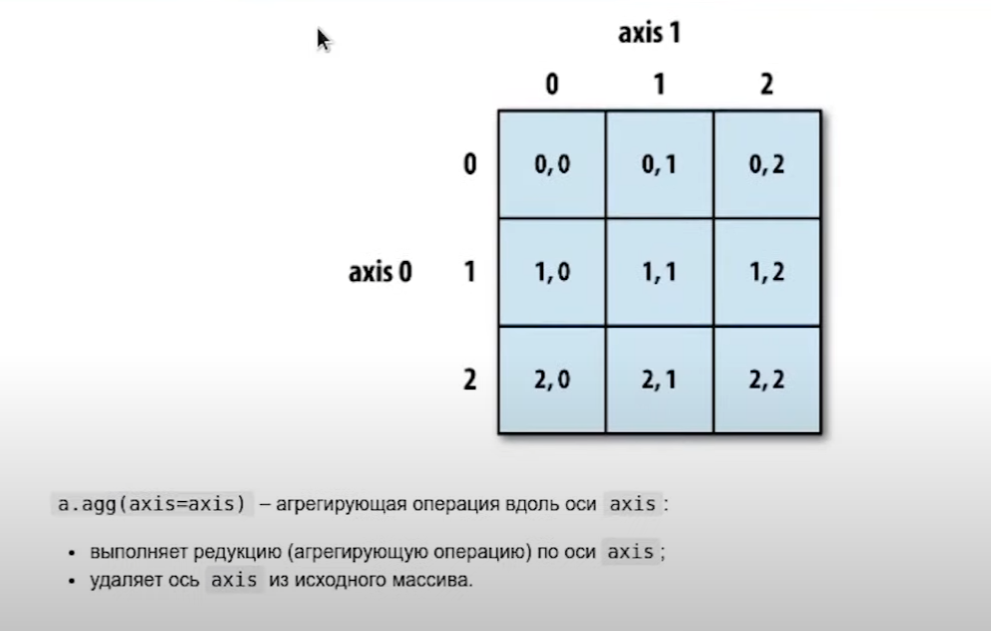

In [68]:
np.random.seed(23234)
a = np.random.randint(0, 10, size=(5, 7))
a

array([[6, 5, 1, 7, 3, 3, 9],
       [3, 1, 5, 0, 7, 3, 7],
       [7, 6, 0, 9, 2, 5, 5],
       [3, 8, 4, 2, 2, 0, 7],
       [8, 3, 0, 3, 2, 0, 4]])

In [69]:
a.max(), a.min() # рассматьривает все элементы таблицы

(9, 0)

двигаемся вдоль оси 0
это значит что агр. операция будет выполнятся для каждого столбца
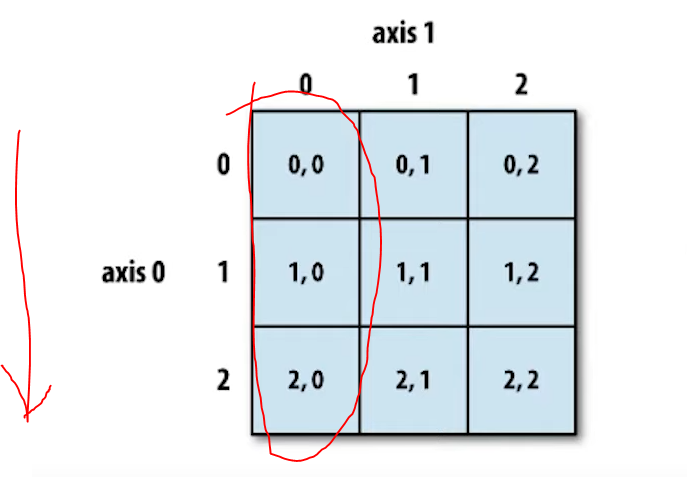



In [70]:
a.min(axis=0)

array([3, 1, 0, 0, 2, 0, 4])

In [71]:
a.argmin()
# позиция минимального элемента в вытянутом массиве
# (в непрервном куске памяти)

10

In [72]:
a.ravel() # вытянутый массив(как он расположен в памяти)

array([6, 5, 1, 7, 3, 3, 9, 3, 1, 5, 0, 7, 3, 7, 7, 6, 0, 9, 2, 5, 5, 3,
       8, 4, 2, 2, 0, 7, 8, 3, 0, 3, 2, 0, 4])

In [73]:
np.unravel_index(a.argmin(), a.shape) 
# переход от одномерного индекса к многомерному

(1, 3)

# Что быстрее

In [74]:
np.random.seed(232334)
a = np.random.randint(0, 100, size=(8, 8))
a

array([[22, 49, 31, 78, 49, 75, 27, 45],
       [92, 77, 67, 68, 85, 86, 83, 42],
       [71, 31,  5, 96, 17,  1, 13,  7],
       [14, 48, 56,  1, 20,  3, 79,  5],
       [19, 38, 42, 28, 52, 25,  8, 41],
       [38, 56, 38, 13, 18, 11, 94, 72],
       [40,  4, 28, 78, 15, 34, 93, 40],
       [37, 22, 23,  6, 31, 99, 88, 19]])

In [75]:
a = a.ravel()
a

array([22, 49, 31, 78, 49, 75, 27, 45, 92, 77, 67, 68, 85, 86, 83, 42, 71,
       31,  5, 96, 17,  1, 13,  7, 14, 48, 56,  1, 20,  3, 79,  5, 19, 38,
       42, 28, 52, 25,  8, 41, 38, 56, 38, 13, 18, 11, 94, 72, 40,  4, 28,
       78, 15, 34, 93, 40, 37, 22, 23,  6, 31, 99, 88, 19])

In [76]:
%%timeit
max(a)

5.33 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [77]:
%%timeit
a.max()

1.85 µs ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Это различие связано с тем, что для работы встроеной функции max необходимо преобразаовать массив numpy в список. К тому же испоользование встроеных функций может привести к ошибкам при работе с многомерными массивами

# Унарные операции над булевыми массивами

In [78]:
a = np.array([True, False, True, False])
a

array([ True, False,  True, False])

In [79]:
a + True

array([ True,  True,  True,  True])

In [80]:
a.any() # вернет true если в массиве есть элемент равный true

True

In [81]:
a.all()
# вернет true если все элементы в массиве равны true

False

In [82]:
(a + True).all()

True

all, any - также **агрегирующие оперции**

In [83]:
a

array([ True, False,  True, False])

In [84]:
np.logical_not(a) # инверсия

array([False,  True, False,  True])

In [85]:
~a

array([False,  True, False,  True])

In [86]:
a.astype(int) # самена типа данных

array([1, 0, 1, 0])

# Бинарные операции

In [87]:
np.random.seed(4345)
b = np.random.randint(0, 100, size=(6, 6))
b

array([[16, 37, 87, 68, 36, 96],
       [33, 23, 97, 60, 77, 46],
       [84, 42, 19,  1, 94, 83],
       [10,  2,  6, 63, 35, 72],
       [27, 45,  8, 35, 38, 70],
       [35, 51, 68, 39, 20, 15]])

In [88]:
np.random.seed(43435)
c = np.random.randint(0, 100, size=(6, 6))
c

array([[ 3, 44, 38, 12, 77, 29],
       [97, 46,  0, 92, 48,  8],
       [85, 18, 32, 74, 24, 15],
       [64, 50, 18, 67, 93, 60],
       [25, 77, 72, 32, 72, 93],
       [94, 27, 23, 86, 63, 19]])

In [89]:
b + c

array([[ 19,  81, 125,  80, 113, 125],
       [130,  69,  97, 152, 125,  54],
       [169,  60,  51,  75, 118,  98],
       [ 74,  52,  24, 130, 128, 132],
       [ 52, 122,  80,  67, 110, 163],
       [129,  78,  91, 125,  83,  34]])

In [90]:
b * c

array([[  48, 1628, 3306,  816, 2772, 2784],
       [3201, 1058,    0, 5520, 3696,  368],
       [7140,  756,  608,   74, 2256, 1245],
       [ 640,  100,  108, 4221, 3255, 4320],
       [ 675, 3465,  576, 1120, 2736, 6510],
       [3290, 1377, 1564, 3354, 1260,  285]])

In [91]:
np.fmax(b, c) # помещает в новый массив больший элемент

array([[16, 44, 87, 68, 77, 96],
       [97, 46, 97, 92, 77, 46],
       [85, 42, 32, 74, 94, 83],
       [64, 50, 18, 67, 93, 72],
       [27, 77, 72, 35, 72, 93],
       [94, 51, 68, 86, 63, 19]])

In [92]:
 c < b # поэлементное сравнение

array([[ True, False,  True,  True, False,  True],
       [False, False,  True, False,  True,  True],
       [False,  True, False, False,  True,  True],
       [False, False, False, False, False,  True],
       [ True, False, False,  True, False, False],
       [False,  True,  True, False, False, False]])

In [93]:
c == b

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [94]:
c < c + b

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [95]:
np.random.seed(12313)
a = np.random.random(size=(3, 5))
a

array([[0.79007928, 0.69539594, 0.18252816, 0.56368032, 0.83356895],
       [0.8355478 , 0.59768223, 0.69335864, 0.23226438, 0.6447323 ],
       [0.31103915, 0.84456807, 0.50944993, 0.25521552, 0.21722818]])

In [96]:
np.random.seed(123132)
b = np.random.random(size=(3, 5))
b

array([[0.07644984, 0.06004577, 0.89174614, 0.90732998, 0.100939  ],
       [0.86886592, 0.1538228 , 0.32142327, 0.44910974, 0.81427975],
       [0.13886794, 0.03854953, 0.60060533, 0.08567933, 0.45069407]])

In [97]:
np.isclose(a, b) 
# по-элементно проверяет:
# равны ли приблизительдно элементы двух массивов
# shift + tab для вывода инвы о парраметрах фукции

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [98]:
np.allclose(a, b) # эквивалентно np.isclose(a, b).all()

False

In [99]:
# можно задать точность
np.isclose(a, b, atol=1e-1) # atol=1e-1 отпрасываем все после
# одного знака (после запятой)

array([[False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False]])

# Бинарные операции над булевыми массивами

In [100]:
a = np.array([1, 0, 1, 1, 0, 1, 1], dtype=bool)
a

array([ True, False,  True,  True, False,  True,  True])

In [101]:
b = np.array([1, 1, 1, 0, 0, 0, 1], dtype=bool)
b

array([ True,  True,  True, False, False, False,  True])

In [102]:
np.logical_and(a, b), np.logical_not(a)

(array([ True, False,  True, False, False, False,  True]),
 array([False,  True, False, False,  True, False, False]))

In [103]:
np.logical_or(a, b), np.logical_xor(a, b)

(array([ True,  True,  True,  True, False,  True,  True]),
 array([False,  True, False,  True, False,  True, False]))

In [104]:
a,b

(array([ True, False,  True,  True, False,  True,  True]),
 array([ True,  True,  True, False, False, False,  True]))

In [105]:
np.logical_xor(a, b)

array([False,  True, False,  True, False,  True, False])

In [106]:
np.logical_xor([True], [True])

array([False])

In [107]:
a & b, a | b, a ^ b # или так bitwise

(array([ True, False,  True, False, False, False,  True]),
 array([ True,  True,  True,  True, False,  True,  True]),
 array([False,  True, False,  True, False,  True, False]))

In [108]:
a = np.array([12, 122, 33, 41])
b = np.array([10, 213, 2, 11])
a & b, a | b, a ^ b, ~a

(array([ 8, 80,  0,  9], dtype=int32),
 array([ 14, 255,  35,  43], dtype=int32),
 array([  6, 175,  35,  34], dtype=int32),
 array([ -13, -123,  -34,  -42], dtype=int32))

In [109]:
np.bitwise_and(a, b), np.bitwise_or(a, b), np.bitwise_xor(a, b), np.bitwise_not(a)

(array([ 8, 80,  0,  9], dtype=int32),
 array([ 14, 255,  35,  43], dtype=int32),
 array([  6, 175,  35,  34], dtype=int32),
 array([ -13, -123,  -34,  -42], dtype=int32))

In [110]:
bin(33), bin(2)

('0b100001', '0b10')

# Более хитрые примеры бинарных операций

In [111]:
# допустим, есть массивы
a = np.arange(20).reshape(4, -1)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [112]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [113]:
a + b # первый массив прибавится ко всем другим массивам

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13],
       [10, 12, 14, 16, 18],
       [15, 17, 19, 21, 23]])

Это возможно потому что массив "b" имеет такой же размер как и строки двумерного массива "a"

In [114]:
b = np.arange(4)
a + b

ValueError: operands could not be broadcast together with shapes (4,5) (4,) 

In [ ]:
b = np.arange(4)[:, np.newaxis]
b

In [ ]:
a

In [ ]:
print('a.shape=', a.shape)
print('b.shape=', b.shape)

In [ ]:
a + b

Мы прибавили входной столбец ко всем столбцам матрицы. Это возможно потому что массив "b" имеет такой же размер как и столбцы двумерного массива "a"

## И еще более хитрые примеры бинарных операций

In [ ]:
a = np.arange(10).reshape((1, -1))
a

In [ ]:
b = np.arange(10).reshape((-1, 1))
b

In [ ]:
a.shape, b.shape

Оказывается и над такими массивами можно совершить бинарную операцию

In [ ]:
a + b

В данном случае строка массива "a" прибавляется ко всем строкам массива "b", прочем выполняются операции аналогичные следующей:

In [ ]:
np.array([10]) + np.array([0, 1, 2, 3])

Это очень удобно если нужно по-парно сравнить все  элементы массивов

In [ ]:
a > b

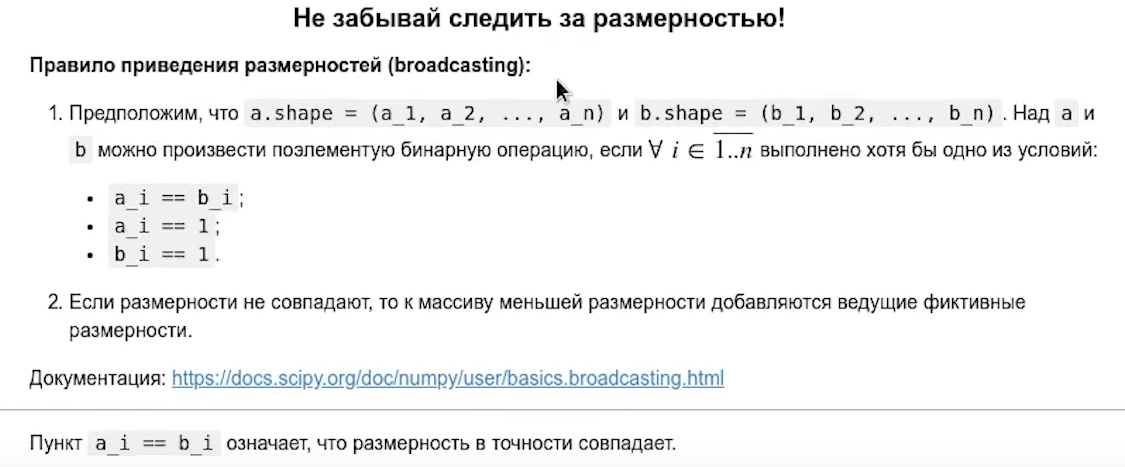

Проще говоря либо все размерности совпадают, либо один элементов которые не совпадают (либо a_i, либо b_i) равен 1

In [ ]:
a = np.arange(6).reshape(3, -1)
a

In [ ]:
b = np.arange(6).reshape(3, -1)
b

In [ ]:
a.shape, b.shape

In [ ]:
a + b

In [ ]:
a = a.reshape(2, -1)
a

In [ ]:
a.shape, b.shape

In [ ]:
a + b

In [ ]:
a = a.reshape(-1, 1)
a

In [ ]:
b

In [ ]:
a.shape, b.shape

In [ ]:
a + b

In [ ]:
a = np.arange(3).reshape((3, -1))
a

In [ ]:
b

In [ ]:
a.shape, b.shape

In [ ]:
a + b

Та размерность, которая равна единичке повторяется **нужное** числ раз (элементы "копируется"), пока массивы не совпадут. Делаются операции похожие на эти:

In [ ]:
a

In [ ]:
b

In [ ]:
c = np.repeat(a, b.shape[1], axis=1)
c

In [ ]:
b + c

Пусть есть следующие массивы:

In [ ]:
a = np.array([[[1, 2, 3]]])
b = np.array([1, 2, 4, 4, 5, 6]).reshape(3, 2, 1)
a

In [ ]:
b

In [ ]:
a.shape, b.shape

In [ ]:
np.repeat(a, b.shape[0], axis=0)

In [ ]:
cop_a = np.repeat(np.repeat(a, b.shape[0], axis=0), b.shape[1], axis=1)
cop_a

In [ ]:
cop_b = np.repeat(b, a.shape[2], axis=2)
cop_b

In [ ]:
cop_a + cop_b

In [ ]:
a + b

**Если массивы размерностей не совпадают:**

Нужно произвести по-строчное суммирование

Broad casting - операция приведения размерностей

In [ ]:
a = np.array([1, 2, 3, 4, 5])
b = np.arange(20).reshape((4, 5))

In [ ]:
a

In [ ]:
b

In [ ]:
a.shape, b.shape

Добавим фиктивную ось в соотвтествии с правилом приведенном выше

In [ ]:
a = a[np.newaxis, :]

In [ ]:
a.shape, b.shape

In [ ]:
a

In [ ]:
b

In [ ]:
a + b

## Матричные операции над массивами

In [ ]:
av = np.arange(12).reshape((4, -1))
av

In [ ]:
bv = np.arange(12).reshape((-1, 4))
bv

In [ ]:
np.matmul(av, bv) # матричные умножения

In [ ]:
np.dot(av, bv) # скалярное произведение между векторами

In [ ]:
am = np.asmatrix(av) # полученная матрица указывает на те же
# данные, что и av
bm = np.matrix(bv) # копирует данные в новую матрицу

In [ ]:
am

In [ ]:
bm

In [ ]:
am * bm # выполняется МАТРИЧНОЕ умножение

In [ ]:
np.multiply(am, am) # поэлементное умножение

In [ ]:
am = np.asmatrix(np.arange(4).reshape((2, 2)))
am

In [ ]:
am ** 2 # также выполняется матричное умножение

In [ ]:
am ** 3

# Индексация в одномерных массивах


In [ ]:
a = np.arange(15)
a

In [ ]:
a[0], a[5], a[-1], a[a.size - 1]

### Срезы (slice)

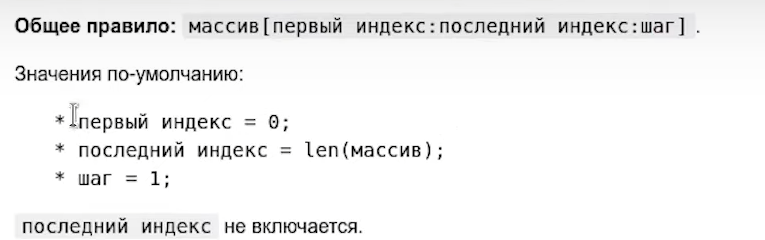

In [ ]:
a[::2] # если перед двоеточием пропуск то ставится значение 
# по-умолчанию

In [ ]:
# или так
a[slice(0, 15, 2)]

In [ ]:
a[::-1]

In [ ]:
# Срезы НЕ КОПИРУЮТ элементы массива!!
g = np.array([0, 1, 2])
g[0:2][0] = 100
g


### Булева индексация (маски)

In [ ]:
a = np.random.randint(-100, 100, 9)
a

In [ ]:
a > 0

In [ ]:
a[a > 0] # берутся только те элементы для которых a > 0 true

In [ ]:
# найдем элементы кратные двум
a[a % 2 == 0]

In [ ]:
# или так
mask = a % 2 == 0
mask

In [ ]:
a[mask]

# Индексация в многомерных массивах

In [ ]:
a = np.arange(12).reshape((4, 3))
a[:, 0] = -a[:, 0]
a

In [ ]:
a[2][1] # не надо так. Мы работаем с numpy массивом а не 
#со спимками (будет слижком много копирований данных)

In [ ]:
# лучше так
a[2, 1] 
# в таком случае мы работаем с массивом numpy а не со списками

In [ ]:
a[-1, -2]

In [ ]:
a[:, 2] # указываем срез и выбираем столбец
# (берем изо всех строк второй элемент)

In [ ]:
a[:,::2]
# изо всех строк берем элементы с шагом 2

In [ ]:
a == 0

In [ ]:
(a==0)[:,0]

In [ ]:
(a == 0).shape

In [ ]:
(a == 0).any(axis=1) # any вернет массив с результатами для
# каждой строки

In [ ]:
a[(a == 0).any(axis=1)] # вернет строки в которых есть хотя бы
# один ноль

In [ ]:
np.array([True, False, True]).sum()

In [ ]:
m = np.array([[True, False, True], [True, False, False]])
m[:, np.all(m, axis=0)]

In [ ]:
a[:, (a > 0).sum(axis=0) > (a < 0).sum(axis=0)]
# берутся только те столбцы в которых число положительных
# чисел больше числа отрицательных

In [ ]:
a[a > 0] # плучить положительные элементы

In [ ]:
# получить индексы положительных элементов
np.where(a > 0) # первый массив - строки (индексы по оси 0)
# второй - индексы по оси 1

In [ ]:
m = np.array([[1, 2, 1, 2], [0, 2, 3, 1]])
m[[0, 1], [0, 1]] # можно пердавать сразу список нужных 
# индексов

In [ ]:
# получим эти элементы
a[np.where(a > 0)]

In [ ]:
m = np.array([1, 2])
n = np.array([2, 1])
np.vstack((m, n)) # vstack объединяет два массива копируя их

In [ ]:
m = np.array([1, 2])
n = np.array([2, 1])
u = np.vstack((m, n)) 
u[0, 0] = 3333
m[0]

In [ ]:
u.T # операция транспонирования

In [ ]:
np.vstack(np.where(a > 0)).T

## Fancy indexing

**Fancy indexing (прихотливая индексация)** - индексация при которой явно указываются (через индексы по разным осям) элементы массива, которые необходимо взять

In [ ]:
a

In [ ]:
# получить 1, 3, и 2 строки
a[[1, 3, 2]]

In [ ]:
# аналогично и с элементами
a[[1, 3, 2], [2, 0, 1]]
# полученный массив НЕ КОПИРУЕТ элементы

In [ ]:
a[[1, 3, 2], [2, 1]]

In [ ]:
n = np.arange(20).reshape((4, 5))
n

In [ ]:
n[[1, 2], [2, 3]] =1000
n

In [ ]:
n[[0, 1], :] = 100000
n

В приведенном ниже примере значение в n не меняются, так как после взятия первого среза 
берется второй срез ("Срез-среза"), где меняется индексация, в связи с этим создается копия элементов n[[0, 1], :]

In [ ]:
# copy
n[[0, 1], :][:, [0, 3, 2]] = 8800555
n

Для того чтобы не делать копию, можно сделать следующее

In [ ]:
n[np.ix_([0, 1], [0, 3, 2])] = 888
n

In [ ]:
j = np.arange(30).reshape((5, 6))
print(j)
j[[0, 2, 3], :] = 10
j

In [ ]:
n[np.ix_([1,])]

**view (представление)** - представление массива (его форма может изменятся, но он, при этом, указывает на те же яачейки что и исходный массив)

**copy (копия)** - копия массива

Представления создаются:
1. При изменении формы массива через методы numpy
2. Вручную (при вызове метода view)

...

Копии создаются:
1. При индексации среза
2. Вручную (при помощи copy)

...


view - метод возвращающий копию представления массива

Ниже приведен пример "зачем нужен view?". В данном случае произойдет изменение формы исходного массива по ссылке k, что не безопасно, так как это может привести к сбоям в других частях программы

In [ ]:
z = np.array([1, 2, 3, 4, 5, 19])
k = z # k и z ссылаются на один и тот же массив
k.shape = 3, 2
z

In [ ]:
# лучше так
z = np.array([1, 2, 3, 4, 5, 19])
k = z.view()
k.shape = 3, 2
z

## Сокращенная индексация

Допустим есть многомерный массив и необходимо пропустить некоторые размерности

In [ ]:
a = np.arange(24).reshape(2, 3, 4)
a

In [ ]:
a[..., 0] # берем нулевые элементы из последних 
# размерностей

In [ ]:
# аналогично
a[:, :, 0]

In [ ]:
a[0, ...] # взять первый элемент первой размерности
# при этом берем все элементы других размерностей

In [ ]:
a[..., 0, :]

Любой многомерный массив (для удобства) можно представить в виде дерева

In [ ]:
arr = [
    [
        [3, 4, 5],
        [6, 22, 4],
        [1, 1, 1],
    ],
    [
        [1, 22, 5],
        [26, 2112, 4],
        [12, 14, 1],
    ]
]
a.shape

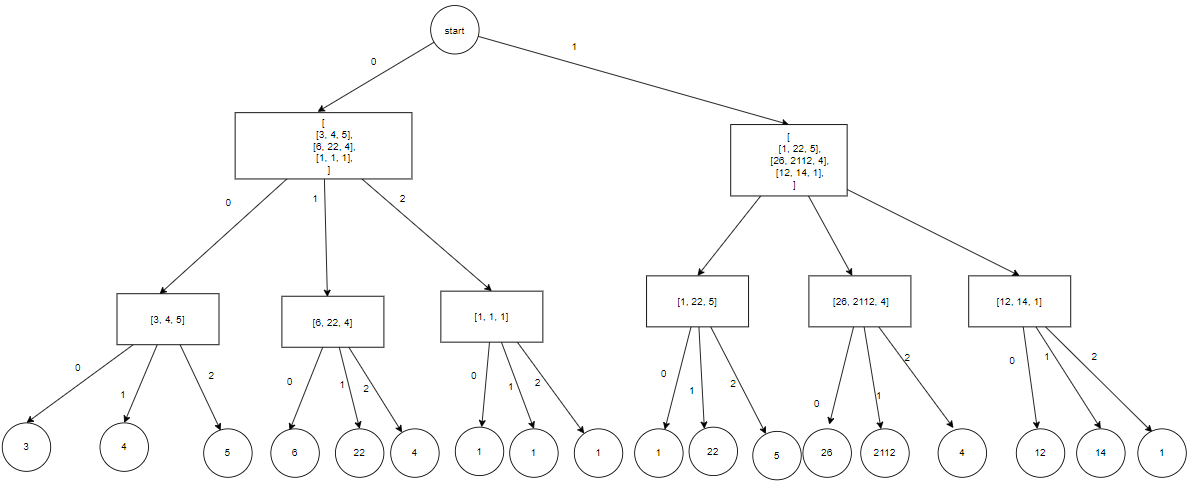

## Генерация случайных чисел

In [ ]:
np.random.rand(10) # число в интервале [0; 1]

In [ ]:
np.random.randint(0, 6, 10)
# целые числа [0, 6), всего 10 чисел

In [ ]:
np.random.permutation(5)
# случайная перестановка пяти элементов
# (это индексы в интервале [0, 5))

choice: из коллекции из n (десяти) элементов берется последовательно случайным образом m (пять) элементов (извлекаются их индексы), при этом после каждого извлечения элемент возвращается обратно в коллекцию 

In [ ]:
np.random.choice(10, size=5)
# из колекции в 10 элементов случайно бере

## Сортировка

In [ ]:
a = np.random.randint(0, 100, 20).reshape((4, 5))
a

In [ ]:
np.sort(a.ravel()) # вернет отсортированую копию

In [ ]:
m = a.ravel().copy()
m.sort() # сортирует массив не возвращая копию
m

sort - также агрегирующая операция

In [ ]:
np.sort(a, axis=1)

In [ ]:
np.sort(a, axis=0)

In [ ]:
a

In [ ]:
np.argsort(a, axis=1)
# данном случае возвращаеются индексы изначального
# массива, в таком порядке, при котором 
# элементы массива располагаются в отсортированном
# виде

In [ ]:
# получение уникальных элементов массива
np.unique(a)

## Объединение массивов

In [ ]:
a = np.random.randint(50, 100, 6).reshape(3, 2)
a

In [ ]:
b = np.random.randint(50, 100, 6).reshape(3, 2)
b

In [ ]:
np.vstack((a, b))
# последовательное соединение массивов

In [ ]:
np.concatenate((a, b), axis=1)
# объединение массивов вдоль конкретной оси

In [ ]:
np.hstack((a, b)) 
# горизонтальная конкатенация 
# (аналог concatenate((a, b), axis=1))

In [ ]:
a

In [ ]:
np.unique(a, return_counts=True) # вернет уникальные элементы и их частоты

In [ ]:
import numpy as np
np.arange(12 * 12).reshape((12, 12)).reshape(12 * 12)

In [ ]:
np.prod((3, 2))

In [ ]:
def fub():
    pass
type(fub())
type(fub() if 1 > 0 else 12)
if None:
    print(True)

In [ ]:
f = np.random.randint(0, 10, 12000000)
f

In [ ]:

count = np.zeros(10)
for i in f:

    count[i] += 1
count

In [ ]:

np.unique(f, return_counts=True)

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(3), [12, 14, 11])

In [ ]:
x = np.arange(1, 1123123)

In [ ]:
%%timeit
for i in x:
    i += i - 1
    su = np.log(i)

In [ ]:
%%timeit
def do_it(x):
    x += x - 1
    su = np.log(x)
f = np.vectorize(do_it)
f(x)

In [ ]:
x = x
x

In [117]:
import numpy as np

np.random.seed = 12
a = np.random.randint(0, 10, 10).reshape(5, 2)
b = np.random.randint(0, 3, 5)
a, b

(array([[9, 0],
        [6, 3],
        [9, 2],
        [1, 5],
        [8, 6]]),
 array([1, 0, 0, 0, 1]))

In [118]:
a[b > 0]

array([[9, 0],
       [8, 6]])

In [124]:
a[[1, 1], [0, 1]]

array([6, 3])

In [ ]:
np.fromi